<h1><center>Polynomial Linear Regression</center></h1>

<h4>About this Notebook</h4>
In this notebook, we learn how to use scikit-learn for Polynomial regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate our model using test set, and finally use model to predict unknown value.

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<hr>

- create new dataframe with selected features:

- The cumulative distribution function (cdf) of a real-valued random variable, or just distribution function of, evaluated at, is the probability that will take a value less than or equal to

<hr>

In [83]:
df = pd.read_csv('datasets/FuelConsumptionCo2.csv')
filter_df = ['VEHICLECLASS',
            'ENGINESIZE',
            'CYLINDERS',
            'FUELCONSUMPTION_CITY',
            'FUELCONSUMPTION_HWY',
            'FUELCONSUMPTION_COMB',
            'CO2EMISSIONS']
cdf = df[filter_df]
cdf.head(2)

,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,COMPACT,2.0,4,9.9,6.7,8.5,196
1,COMPACT,2.4,4,11.2,7.7,9.6,221


In [27]:
# list(df.columns)

<hr>

- plot the data to determine if there is a linear relationship within the points

- plt.scatter( df.column1, df.column2, color='some_color')

- label x and y axis with plt.xlabel, plt.ylabel

- plt.show() renders the graph

<hr>

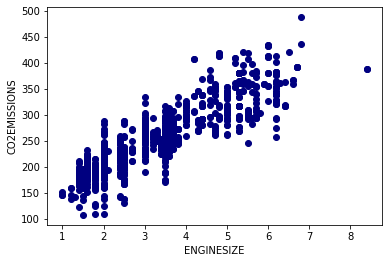

In [122]:
x_col = 'ENGINESIZE'
y_col = 'CO2EMISSIONS'
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='navy')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

<hr>

#### Training and Testing Data

- split dataset into training and testing data

- training data allows the alogrithm to determine a generalized equation using known inputs and known outputs

- using testing data allows the alogrithm to determine the validity of the generalized equation created by the training data

- testing data checks to see how correct the generalized equation in producing an output by comparing the output from the equation to the known output

<hr>

<hr>

### Approach

- use an 80/20 split on the data frame, where 80% of the df consists of the training data and 20% consists of the testing data

- numpy docs: numpy.random.rand(d0, d1, ..., dn) outputs an array of random numbers with a length of the parameter
- numpy.random.rand(len(df)) < (some percentage) outputs an array of, random indexed, boolean values with the a length of the parameter

- df numpy.random.rand(len(df)) < (some percentage) only outputs values which were true from the array and applies the array to all of the columns within the df

- '~' are the False values which are then stored as testing df


<hr>

In [123]:
split = np.random.rand(len(df)) < .8
training_set = cdf[split]
test_set = cdf[~split]

print('# of rows in Train set = ', len(train))
print('# of rows in Test set  = ', len(test))
print('# of rows in total     = ', len(test) + len(train))

# of rows in Train set =  854
# of rows in Test set  =  213
# of rows in total     =  1067


In [86]:
features =  ['ENGINESIZE']
predicted_value = ['CO2EMISSIONS']

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
clf = LinearRegression()

<hr>

<h1 id="multiple_regression_model">Polynomial Regression Model</h1>

Motivation:
- target equation: $y = b + \theta_1  x + \theta_2 x^2 + \theta_3 x^3$

<br>
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$y = b + \theta_1  x + \theta_2 x^2 + \theta_3 x^3$

Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: 1, $x$, and $x^2$.



__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

In [125]:
train_x = np.asanyarray(training_set[features])
train_y = np.asanyarray(training_set[predicted_value])

test_x = np.asanyarray(test_set[features])
test_y = np.asanyarray(test_set[predicted_value])


<hr>

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2 & v_1^3 ]\\
    [ 1 & v_2 & v_2^2 & v_1^3]\\
    \vdots & \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2 & v_n^3]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4. & 6.]\\
    [ 1 & 2.4 & 5.76 & 13.82]\\
    [ 1 & 3.5 & 12.25 & 42.87]\\
    \vdots & \vdots & \vdots & \vdots\\
\end{bmatrix}
$

<hr>

In [126]:
poly_vector = PolynomialFeatures(degree=3)
train_x_poly = poly_vector.fit_transform(train_x)
train_x_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

<hr>

### Polynomial Equation Parameters:
$y = b + \theta_1  x + \theta_2 x^2 + \theta_3 x^3$

- first value of coefficent array is ommited

<hr>

In [89]:
clf.fit(train_x_poly, train_y)
print('equation intercept', clf.intercept_[0])
print('equation coeficients', clf.coef_[0]) # first index is ommited

equation intercept 129.27136267117953
equation coeficients [ 0.         28.52312301  4.50961014 -0.48412225]


<hr>

### Approach cont.

- np.arange is used to plot along the x-axis

From the Numpy docs:

- numpy.arange(start, stop, step, dtype=None)

    --Return evenly spaced values within a given interval.

- parameters:

    --start:number, optional
Start of interval. The interval includes this value. The default start value is 0.

    --stop:number
End of interval. The interval does not include this value, except in some cases where step is not an integer and floating point round-off affects the length of out.

    --step:number, optional
Spacing between values. For any output out, this is the distance between two adjacent values, out[i+1] - out[i]. The default step size is 1. If step is specified as a position argument, start must also be given.

    --dtype:dtype
The type of the output array. If dtype is not given, infer the data type from the other input arguments.


<hr>

<hr>

### Plot Polynomial Equation:
X = an interval of points

Y = $b + \theta_1  x + \theta_2 x^2 + \theta_3 x^3$

<hr>

In [130]:
X = np.arange(0.0, 10.0, 0.1) 
Y = clf.intercept_ + (clf.coef_[0][1]*X) + (clf.coef_[0][2]*np.power(X,2)) + (clf.coef_[0][3]*np.power(X,3))

X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

<hr>

### Overlay the graphs:
- Initial scatter plot using selected feature and desired output

- Linear regression line using the equation : $y = b + \theta_1  x + \theta_2 x^2 + \theta_3 x^3$ 

<hr>

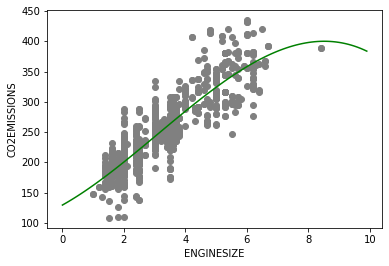

In [128]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='grey')
plt.plot(X, Y, '-g')

plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

<hr>

<h1 id="multiple_regression_model">Evaluation</h1>

<hr>

In [134]:
from sklearn.metrics import r2_score

# create poly vectors using test data
test_poly_x = poly_vector.fit_transform(test_x)

# predict outcomes of test_x
test_y_hat = clf.predict(test_poly_x)

# Mean Absolute Error = test(predicted) - test(actual) 
MAE = np.mean(np.absolute(test_y_hat - test_y))

# Mean Sum of Squares = mean( (predicted - actual) ^ 2 )
MSE = np.mean((test_y_hat - test_y) ** 2)

R2_score = r2_score(test_y_hat, test_y)

print("Mean Absolute Error = %.2f" %MAE)
print("Mean Sum Error      = %.2f" %MSE)
print("r2 score            = %.2f" %R2_score, '\n')
print('Using a 3rd degree polynomial does not perform better when compared to a 2nd degree polynomial')


Mean Absolute Error = 24.08
Mean Sum Error      = 921.00
r2 score            = 0.72 

Using a 3rd degree polynomial does not perform better when compared to a 2nd degree polynomial


<h3>Disclaimer</h3>

This script was orginally from Coursera's [IBM AI Engineering course](https://www.coursera.org/professional-certificates/ai-engineer), authored by <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a> and was modifed to fit my needs. 